In [ ]:
"""clustering Test for multiple values
- Process
    1. PCA로 Feature의 주성분을 분석하여  x,y,z 3개의 값으로 반환 받는다.
    2. conv() function을 사용해서 Dataframe에서 x, y, z값을 return 받아 list에 저장
    3. StandardScaler()를 사용해 정규화 --> 영향력이 높은 변수로 인식될 가능성을 낮춰주기 위해
    4. DBSCAN Algoritm을 사용해서 모델
    5. variable rawpoint에 variable에 (n,3) shape의 형태로 모델 결과 값 저장, y_pred 변수에 clustering결과 값 저장 -> Dataframe에 새로운 컬럼으로 추가
    6. gettrace() function을 사용해 3D visualization

    - 모델 최적화를 위해 변경해 줄 수 있는 값 리스트
    1. PCA(n_components), explained_variance_ratio_ 를 사용해 분산을 기준으로 n_components 조정. 전체 정보에 얼마나 기여하고 있는가를 나태나는 지표가 될 수 있다.
    2. DBSCAN(eps=1, min_samples=10) , (**esp**(기준점부터의 거리) = 0.2, **min_samples**(반경내 있는 점의수) = 20)
    """

In [2]:
import pandas as pd

In [79]:
url = 'https://raw.githubusercontent.com/Byeongin-Jeong/clustering/main/data/DBSCAN_data_2ea.csv'
df = pd.read_csv(url,)
# print(df.head(10))
# print(df.shape)

In [89]:
# 라이브러리 import
import pandas as pd
import seaborn
# import mglearn
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import random
init_notebook_mode(connected=True)

# Importing the dataset
# df = pd.read_csv('data/DBSCAN_data_2ea.csv')
df.tail()

# 차원 데이터를 바탕으로 좌표 데이터 추출(x, y, z)
cols = df.columns[1:]
pca = PCA(n_components = 6)
df['x'] = pca.fit_transform(df[cols])[:, 0]
df['y'] = pca.fit_transform(df[cols])[:, 1]
df['z'] = pca.fit_transform(df[cols])[:, 2]
df.head(100)
k = pca.explained_variance_ratio_ # 분산을 기준으로 n_components 조정

,id,cpu,mem,traffic,x,y,z
0,260,88,21,900000,1.680157e+06,72.347687,168.950947
1,2373,79,21,900000,1.680157e+06,53.902004,160.903789
2,4486,80,21,900000,1.680157e+06,55.951524,161.797917
3,6599,81,21,900000,1.680157e+06,58.001045,162.692046
4,8712,86,21,900000,1.680157e+06,68.248647,167.162690
...,...,...,...,...,...,...,...
95,711,1,14,214789,1.479789e+05,-35.968053,19.124192
96,2824,1,14,214789,1.479789e+05,-35.968053,19.124192
97,4937,1,14,214789,1.479789e+05,-35.968053,19.124192
98,7050,1,14,214789,1.479789e+05,-35.968053,19.124192


In [77]:
# 좌표 데이터 스케일 축소(좌표 범위가 크기 때문)
# xyz 3가지 데이터만 추출해서 반환하는 함수
def conv(i : int):
    return [int(df[i:i+1]['x']), int(df[i:i+1]['y']), int(df[i:i+1]['z'])]
    # return [int(df[i:i+1]['x']), int(df[i:i+1]['y']), int(df[i:i+1]['z']), int(df[i:i+1]['cpu'])]

convlist = []
for ldx in range(0, len(df)):
    convb = conv(ldx)
    convlist.append(convb)

rawpoint = StandardScaler().fit_transform(convlist)

# Data Traning (**esp**(기준점부터의 거리) = 0.2, **min_samples**(반경내 있는 점의수) = 20)
# 학습과 동시에 클러스터링 결과가 출력된다.
db = DBSCAN(eps=1, min_samples=10)
y_pred = db.fit_predict(rawpoint)
df["cluster"] = y_pred

clusternum = max(y_pred)

print ("clusterNum: {}".format(clusternum))
df.head()

clusterNum: 5


,id,cpu,mem,traffic,x,y,z,cluster
0,260,88,21,900000,2.811441e+06,112.209680,275.311580,-1
1,2373,79,21,900000,2.811441e+06,81.682393,261.538483,-1
2,4486,80,21,900000,2.811441e+06,85.074314,263.068827,-1
3,6599,81,21,900000,2.811441e+06,88.466235,264.599171,-1
4,8712,86,21,900000,2.811441e+06,105.425839,272.250891,-1


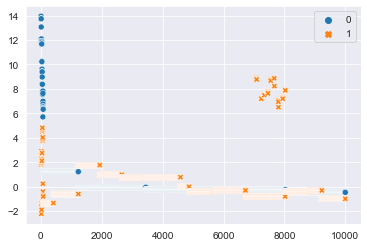

In [59]:
# 2D 그래프 출력
# mglearn.discrete_scatter(rawpoint[:, 0], rawpoint[:, 1], y_pred, markers='o')
seaborn.scatterplot(rawpoint[:, 0:2])

# 클러스터링 제외된 데이터 ID 추출
df.loc[df['cluster'] == -1].head()

# 3D 출력 함수 (클러스터링이 되지 않은 Noise point는 빨간색으로 표시)
# cl_result : -1부터 10까지 각 클러스터 그룹에 속한 모든 array
def gettrace(cl_result, cluster_num):
    if cluster_num == -1:
        r = 255
        g = 0
        b = 0
    else:
        r = random.randrange(50,255)
        g = random.randrange(50,255)
        b = random.randrange(50,255)

    return go.Scatter3d(x = [x[0] for x in cl_result[cluster_num]],
                        y = [y[1] for y in cl_result[cluster_num]],
                        z = [z[2] for z in cl_result[cluster_num]],
                        # cpu = [cpu[3] for cpu in cl_result[cluster_num]],
                        mode='markers',
                        marker=dict(
                            color="rgba({0}, {1}, {2}, 0.5)".format(r, g, b),
                            size=5,
                            symbol='circle',
                            line = dict(width = 1, color = "rgb(0,0,0)"),
                        opacity=0.9
                        ))

In [61]:
# 3D 그래프로 출력 가능하도록 데이터 가공
cluster_result = {}
for i, c in enumerate(y_pred):
    cluster_result.setdefault(c, [])
    cluster_result[c].append(rawpoint[i])

# 3D 데이터 출력
data = []
for idx in range(-1, clusternum +1):
    if idx in cluster_result:
        data.append(gettrace(cluster_result, idx))

iplot(data)
""" 3D Graph 설명
    for loop를 사용해서 -1(noise)부터 설정한 클러스터 개수의 최대값까지 반복문을 사용해서
    gettrace() method를 사용해서 3D graph 반환 받는다."""

' 3D Graph 설명\n    for loop를 사용해서 -1(noise)부터 설정한 클러스터 개수의 최대값까지 반복문을 사용해서\n    gettrace() method를 사용해서 3D graph 반환 받는다.'